# Trabalho Prático Interpretabilidade e Causalidade - Rafael Antunes (a55336)

#### Imports

In [6]:
from model_framework import importar_modelo, mostrar_classes, testar_modelo
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt

## Importação do Modelo e Teste Normal

Modelo encontrado!


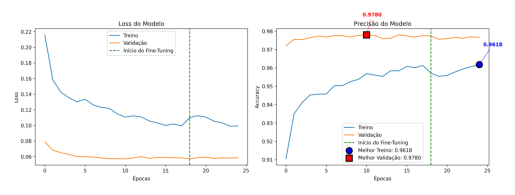

/home/rafabacano/Desktop/Python/venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 42 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Found 24997 files belonging to 2 classes.
Using 19998 files for training.
Found 24997 files belonging to 2 classes.
Using 4999 files for validation.
Shape das Imagens: (32, 128, 128, 3)
Exemplo de Labels: [[1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.
  0. 1. 0. 0. 1. 1. 0. 1.]]
Train: 20000
Val: 5024


2025-12-02 01:25:06.679146: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
train_ds, val_ds, modelo = importar_modelo()

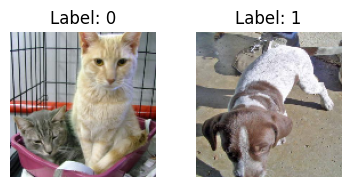

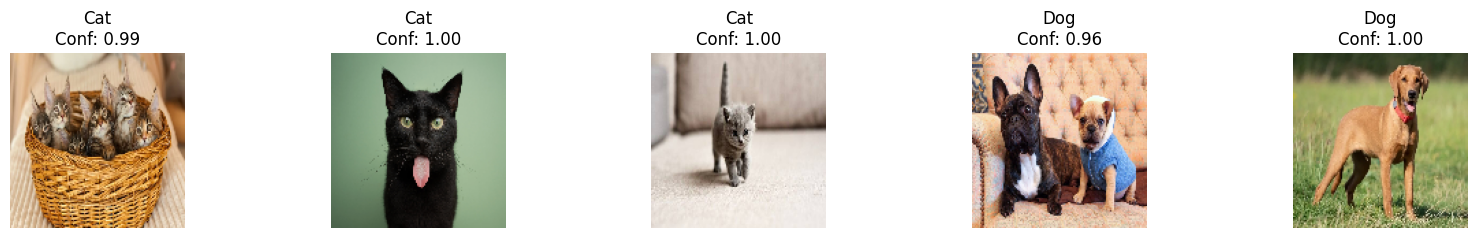

In [8]:
mostrar_classes(train_ds)
testar_modelo(modelo, 5)

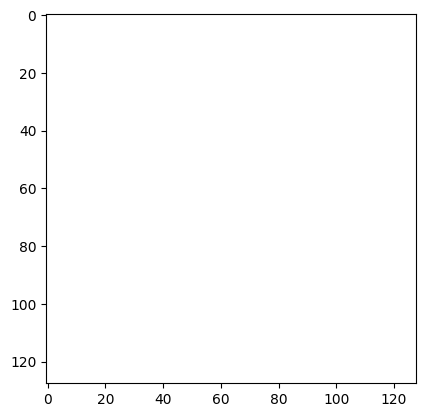

In [9]:
def compute_saliency(model, img_array):
    # Preprocessar EXATAMENTE como na predição
    img_proc = preprocess_input(img_array.copy())
    img_proc = img_proc[None, ...]  # adicionar batch size
    
    img_tensor = tf.convert_to_tensor(img_proc, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(img_tensor)

        preds = model(img_tensor)

        # Como seu modelo é binário (1 output sigmoid)
        class_score = preds[:, 0]

    grads = tape.gradient(class_score, img_tensor)[0]

    saliency = tf.math.abs(grads)

    # normalizar para 0..1
    saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))

    return saliency.numpy()

img = tf.keras.utils.load_img("./teste/teste_cao.png", target_size=(128, 128))
img_array = tf.keras.utils.img_to_array(img)

sal = compute_saliency(modelo, img_array)
plt.imshow(sal, cmap="hot")
plt.show()

